This code will look at the past 20 years of data for a stock on a given day
example: What usualy hapens on july 4th for stocks?


In [43]:
import pandas as pd
import yfinance as yf

# Step 1: Take input of a stock symbol
stock_symbol = input("Enter the stock symbol: ")

# Step 2: Take input of a month
month = input("Enter the month (numeric value): ")

# Step 3: Take input of a day in a month
day = input("Enter the day (numeric value): ")

# Step 4: Retrieve the data of that stock for the specified day and month for every year of available data
data = yf.download(stock_symbol)
print(data.head())
# Filter the data for the specified month and day
filtered_data = data[data.index.month == int(month)]
filtered_data = filtered_data[filtered_data.index.day == int(day)]

# Step 5: Create a pandas DataFrame with columns ['stock ticker', 'date', 'open', 'close', 'volume', 'low', 'high']
df = pd.DataFrame(columns=['stock ticker', 'date', 'open', 'close'])

for date, row in filtered_data.iterrows():
    df.loc[len(df)] = [stock_symbol, date, row['Open'], row['Close']]

# Step 6: Add a new column 'percentage_change' to calculate (close - open) / open
df['intraday-change'] = ((df['close'] - df['open']) / df['open']) * 100

# Step 7: Add a new column 'prev_close' to store the previous day's close
#for index, row in df.iterrows():
 #   found_rows = data[data['Date'] == row.date]
  #  row_index = found_rows.index - 1
   # df["prev_close"] = data[row_index].close

# Step 8: Add a new column 'change_from_prev_close' to calculate (open - prev_close) / prev_close
#df['gap percentage from prev'] = (df['open'] - df['prev_close']) / df['prev_close']

# Step 9: Print the pandas DataFrame
df


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close   Volume
Date                                                                  
1993-01-29  43.96875  43.96875  43.75000  43.93750  25.029366  1003200
1993-02-01  43.96875  44.25000  43.96875  44.25000  25.207392   480500
1993-02-02  44.21875  44.37500  44.12500  44.34375  25.260790   201300
1993-02-03  44.40625  44.84375  44.37500  44.81250  25.527817   529400
1993-02-04  44.96875  45.09375  44.46875  45.00000  25.634619   531500


,stock ticker,date,open,close,intraday-change
0,spy,1994-07-05,44.656250,44.796875,0.314906
1,spy,1995-07-05,54.765625,54.812500,0.085592
2,spy,1996-07-05,66.125000,65.578125,-0.827032
3,spy,2000-07-05,146.375000,144.625000,-1.195559
4,spy,2001-07-05,123.070000,121.680000,-1.129438
5,spy,2002-07-05,96.779999,99.309998,2.614175
6,spy,2005-07-05,119.250000,120.489998,1.039830
7,spy,2006-07-05,127.290001,127.070000,-0.172835
8,spy,2007-07-05,152.399994,152.179993,-0.144358
9,spy,2011-07-05,133.779999,133.809998,0.022424


Graph this

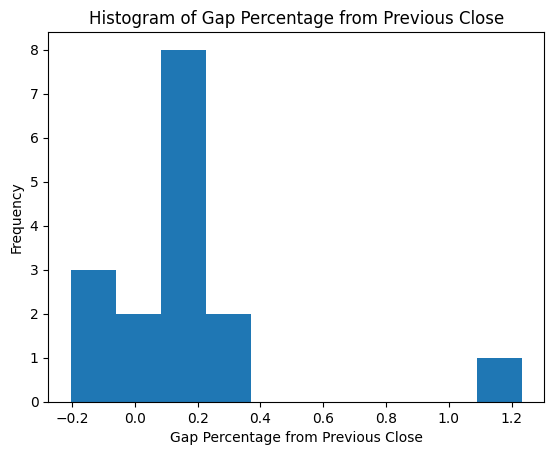

In [25]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(df['gap percentage from prev'], bins=10)

# Set labels and title
plt.xlabel('Gap Percentage from Previous Close')
plt.ylabel('Frequency')
plt.title('Histogram of Gap Percentage from Previous Close')

# Show the histogram
plt.show()


Create a pie chart of gaps

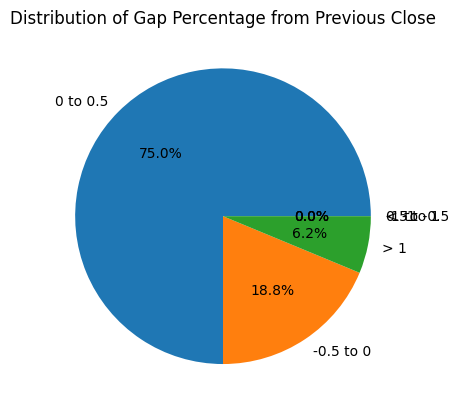

In [26]:
import matplotlib.pyplot as plt

# Define the bin edges
bins = [-float('inf'), -1, -0.5, 0, 0.5, 1, float('inf')]

# Group the values into bins
bin_labels = ['< -1', '-1 to -0.5', '-0.5 to 0', '0 to 0.5', '0.5 to 1', '> 1']
df['bins'] = pd.cut(df['gap percentage from prev'], bins=bins, labels=bin_labels, right=False)

# Count the frequencies for each bin
bin_counts = df['bins'].value_counts()

# Create a pie chart
plt.pie(bin_counts, labels=bin_counts.index, autopct='%1.1f%%')

# Set title
plt.title('Distribution of Gap Percentage from Previous Close')

# Show the pie chart
plt.show()
